# Best Times to Tweets in Healthcare vs. Education

### Read in the csv file

In [2]:
import pandas as pd
df = pd.read_csv(r"E:\OneDrive - University of Georgia\Project\Data\tweet_data_3_groccery\4.3 FourColumns 3+1csv - Copy\grocery_2019_2021_localTime_stateLevel_4_columns.csv",low_memory=False)
#df

### Convert the "Created At" field into a datetime data type, extract the day of the week, and map it onto a new column called "weekdays"

In [3]:
import datetime

df1 = df.copy()

df1['local_time'] = pd.to_datetime(df1['local_time'])
value = df1['local_time']
        
def weekday(date):
    if date.weekday() == 0:
        return 'Monday'
    elif date.weekday() == 1:
        return 'Tuesday'
    elif date.weekday() == 2:
        return 'Wednesday'
    elif date.weekday() == 3:
        return 'Thursday'
    elif date.weekday() == 4:
        return 'Friday'
    elif date.weekday() == 5:
        return 'Saturday'
    else:
        return 'Sunday'

df1["weekdays"] = value.map(weekday)
df1['weekdays']

0            Monday
1            Monday
2            Monday
3            Monday
4            Monday
            ...    
571004    Wednesday
571005    Wednesday
571006    Wednesday
571007    Wednesday
571008    Wednesday
Name: weekdays, Length: 571009, dtype: object

### Extract the time and map it onto a new column called "time"

In [4]:
df2 = df1.copy()

def time(date):
    time2 = date.time()
    return time2

df2["time"] = value.map(time)
df2['time']

0         18:59:29
1         18:56:59
2         18:56:14
3         15:52:33
4         17:50:28
            ...   
571004    18:10:31
571005    16:10:11
571006    19:09:36
571007    19:06:08
571008    19:00:18
Name: time, Length: 571009, dtype: object

### Group the times into hourly buckets and map it onto a new column called "time groups"

In [5]:
df3 = df2.copy()

def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '12AM-1AM'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '1AM-2AM'
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '2AM-3AM'
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '3AM-4AM'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '4AM-5AM'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '5AM-6AM'
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '6AM-7AM'
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '7AM-8AM'
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '8AM-9AM'
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '9AM-10AM'
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10AM-11AM'
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11AM-12PM'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12PM-1PM'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '1PM-2PM'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '2PM-3PM'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '3PM-4PM'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '4PM-5PM'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '5PM-6PM'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '6PM-7PM'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '7PM-8PM'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '8PM-9PM'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '9PM-10PM'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '10PM-11PM'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '11PM-12AM'
    else:
        return 'other'

df3["time groups"] = df3['time'].map(time_groups)
df3

,text,lon,lat,local_time,weekdays,time,time groups
0,@andylassner Walmart specials,-75.386461,39.145023,2020-01-20 18:59:29,Monday,18:59:29,6PM-7PM
1,Walmart just gave me the biggest fucking attit...,-81.986834,26.636480,2020-01-20 18:56:59,Monday,18:56:59,6PM-7PM
2,The Chicken Tenders sub from Publix is the bes...,-81.367773,28.501678,2020-01-20 18:56:14,Monday,18:56:14,6PM-7PM
3,Finna go to Costco y’all want sum ? https://t....,-122.410744,37.770520,2020-01-20 15:52:33,Monday,15:52:33,3PM-4PM
4,they really only got 3 lanes open at Walmart h...,-89.390275,31.316364,2020-01-20 17:50:28,Monday,17:50:28,5PM-6PM
...,...,...,...,...,...,...,...
571004,Apparently the people complaining about the Bi...,-96.347781,30.665859,2021-01-20 18:10:31,Wednesday,18:10:31,6PM-7PM
571005,"Costco - Folsom, California - Five of my famil...",-121.172848,38.667887,2021-01-20 16:10:11,Wednesday,16:10:11,4PM-5PM
571006,Important data supports our gun safety goals. ...,-83.139281,40.125273,2021-01-20 19:09:36,Wednesday,19:09:36,7PM-8PM
571007,No cuz I literally thought she tricked out her...,-81.571184,28.605604,2021-01-20 19:06:08,Wednesday,19:06:08,7PM-8PM


### Get the value counts of "weekdays"

In [6]:
df3['weekdays'].value_counts()

Thursday     84767
Saturday     84298
Friday       82869
Wednesday    82485
Tuesday      80569
Sunday       79094
Monday       76927
Name: weekdays, dtype: int64

### Get the value counts of "time groups"

In [7]:
df3['time groups'].value_counts()

12PM-1PM     39047
1PM-2PM      38194
6PM-7PM      37967
5PM-6PM      37761
2PM-3PM      37098
4PM-5PM      37047
3PM-4PM      36815
7PM-8PM      36278
11AM-12PM    36028
8PM-9PM      33162
10AM-11AM    31718
9PM-10PM     29132
9AM-10AM     27065
10PM-11PM    23208
8AM-9AM      21065
11PM-12AM    16192
7AM-8AM      14143
12AM-1AM     10444
6AM-7AM       8058
1AM-2AM       6134
5AM-6AM       4108
2AM-3AM       3998
4AM-5AM       3082
3AM-4AM       3057
other          208
Name: time groups, dtype: int64

### Renamed "time groups" to "time_groups" for manipulation purposes later

In [8]:
df4 = df3.copy()
df5 = df4.rename(index=str, columns={"time groups": "time_groups"})
df5

,text,lon,lat,local_time,weekdays,time,time_groups
0,@andylassner Walmart specials,-75.386461,39.145023,2020-01-20 18:59:29,Monday,18:59:29,6PM-7PM
1,Walmart just gave me the biggest fucking attit...,-81.986834,26.636480,2020-01-20 18:56:59,Monday,18:56:59,6PM-7PM
2,The Chicken Tenders sub from Publix is the bes...,-81.367773,28.501678,2020-01-20 18:56:14,Monday,18:56:14,6PM-7PM
3,Finna go to Costco y’all want sum ? https://t....,-122.410744,37.770520,2020-01-20 15:52:33,Monday,15:52:33,3PM-4PM
4,they really only got 3 lanes open at Walmart h...,-89.390275,31.316364,2020-01-20 17:50:28,Monday,17:50:28,5PM-6PM
...,...,...,...,...,...,...,...
571004,Apparently the people complaining about the Bi...,-96.347781,30.665859,2021-01-20 18:10:31,Wednesday,18:10:31,6PM-7PM
571005,"Costco - Folsom, California - Five of my famil...",-121.172848,38.667887,2021-01-20 16:10:11,Wednesday,16:10:11,4PM-5PM
571006,Important data supports our gun safety goals. ...,-83.139281,40.125273,2021-01-20 19:09:36,Wednesday,19:09:36,7PM-8PM
571007,No cuz I literally thought she tricked out her...,-81.571184,28.605604,2021-01-20 19:06:08,Wednesday,19:06:08,7PM-8PM


### Define the efficiency scores for the heat map

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                "Friday", "Saturday", "Sunday"]
time_frames = ["12AM-1AM", "1AM-2AM", "2AM-3AM", "3AM-4AM", "4AM-5AM", 
               "5AM-6AM", "6AM-7AM", "7AM-8AM", "8AM-9AM", "9AM-10AM",
               "10AM-11AM", "11AM-12PM", "12PM-1PM", "1PM-2PM", "2PM-3PM",
               "3PM-4PM", "4PM-5PM", "5PM-6PM", "6PM-7PM", "7PM-8PM",
               "8PM-9PM", "9PM-10PM", "10PM-11PM", "11PM-12AM"]


def hc_efficiency_score(df, day, times):
    array1 = []
    array2=[]
    instance_val = 0
    #for each of the time frames
    for time in times:
        #locate the day of the week and the specific time frame, pull the data
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays", "time_groups"]]
        #If there are no tweets in that time frame
        if m1["time_groups"].count() == 0:
            #instance_val = 0
            #lowest category
            sum1 = 0
        else:
            #Sum the retweets, replies, and favorites and divide by num of tweets
            instance_val =  m1["time_groups"].count()
            array2.append(instance_val)
            #589.625 1392.5 2596.375 3876.5 4856.625 5232.25 5449.25 6275
            #putting the tweets into categorical buckets
            if  instance_val >=  quartile_15 and instance_val <quartile_16+1:
                sum1 = 16
            elif instance_val >= quartile_14 and instance_val < quartile_15:
                sum1 = 15
            elif  instance_val >=  quartile_13 and instance_val <quartile_14:
                sum1 = 14
            elif instance_val >= quartile_12 and instance_val < quartile_13:
                sum1 = 13
            elif instance_val >= quartile_11 and instance_val < quartile_12:
                sum1 = 12
            elif instance_val >= quartile_10 and instance_val < quartile_11:
                sum1 = 11
            elif instance_val >= quartile_9 and instance_val < quartile_10:
                sum1 = 10
            elif instance_val >=  quartile_8 and instance_val <quartile_9:
                sum1 = 9
            elif instance_val >= quartile_7 and instance_val <quartile_8:
                sum1 = 8
            elif instance_val >= quartile_6 and instance_val < quartile_7:
                sum1 = 7
            elif instance_val >= quartile_5 and instance_val < quartile_6:
                sum1 = 6
            elif instance_val >= quartile_4 and instance_val < quartile_5:
                sum1 = 5
            elif instance_val >= quartile_3 and instance_val < quartile_4:
                sum1 = 4
            elif instance_val >=  quartile_2 and instance_val <quartile_3:
                sum1 = 3
            elif instance_val >= quartile_1 and instance_val <quartile_2:
                sum1 = 2
            else:
                sum1 = 1
        
        array1.append(sum1)
        
    print(array2)
    return array1

### Heat map for Tweets

[1355, 804, 527, 439, 434, 566, 1147, 1834, 2678, 3346, 3873, 4570, 5063, 4887, 4817, 4792, 5032, 5275, 5448, 5287, 4907, 4143, 3412, 2260]
[1420, 909, 549, 400, 421, 622, 1226, 2026, 2947, 3756, 4290, 4851, 5283, 5338, 5032, 4901, 5239, 5448, 5406, 5439, 4944, 4305, 3365, 2423]
[1483, 789, 527, 427, 411, 592, 1261, 2276, 3080, 3840, 4465, 4905, 5314, 5230, 4974, 4953, 5183, 5417, 5663, 5552, 5222, 4678, 3694, 2512]
[1498, 815, 593, 421, 479, 675, 1311, 2205, 3238, 4006, 4496, 5072, 5797, 5339, 5277, 5712, 5334, 5537, 5983, 5458, 5042, 4636, 3444, 2370]
[1612, 926, 630, 410, 510, 722, 1405, 2344, 3340, 4063, 4764, 5266, 5522, 5513, 5359, 5140, 5367, 5542, 5551, 5048, 4504, 3849, 3180, 2271]
[1544, 939, 573, 462, 405, 474, 926, 1930, 3135, 4266, 5387, 6100, 6275, 6231, 6062, 5828, 5571, 5318, 4959, 4628, 4183, 3641, 3130, 2305]
[1532, 952, 599, 498, 422, 457, 782, 1528, 2647, 3788, 4443, 5264, 5793, 5656, 5577, 5489, 5321, 5224, 4957, 4866, 4360, 3880, 2983, 2051]
[[4, 3, 2, 1, 1, 2, 4,

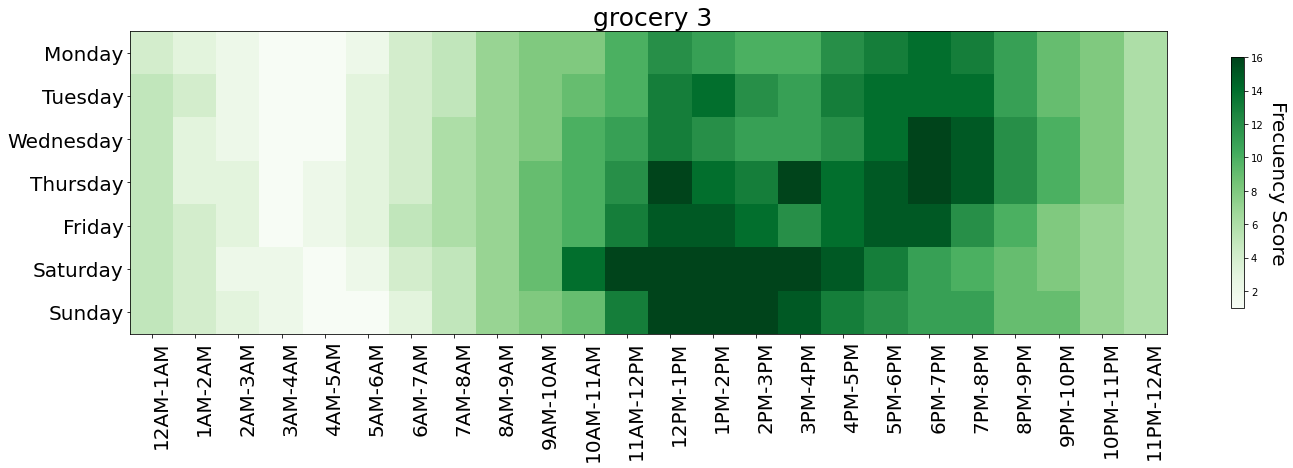

In [17]:
tweet_score = []

m_array = hc_efficiency_score(df5, "Monday", time_frames)
tweet_score.append(m_array)
t_array = hc_efficiency_score(df5, "Tuesday", time_frames)
tweet_score.append(t_array)
w_array = hc_efficiency_score(df5, "Wednesday", time_frames)
tweet_score.append(w_array)
th_array = hc_efficiency_score(df5, "Thursday", time_frames)
tweet_score.append(th_array)
f_array = hc_efficiency_score(df5, "Friday", time_frames)
tweet_score.append(f_array)
st_array = hc_efficiency_score(df5, "Saturday", time_frames)
tweet_score.append(st_array)
s_array = hc_efficiency_score(df5, "Sunday", time_frames)
tweet_score.append(s_array)
print(tweet_score)

fig, ax = plt.subplots(figsize=(20,50))
#(figsize=(width,height))
im = ax.imshow(tweet_score, cmap = cm.Greens)

#get rid of grid lines
ax.grid(False)

#show all ticks...
ax.set_xticks(np.arange(len(time_frames)))
ax.set_yticks(np.arange(len(days_of_week)))
# ... and label them with the respective list entries
ax.set_xticklabels(time_frames, fontsize=20)
ax.set_yticklabels(days_of_week, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

cbarlabel = "Frecuency Score"

cbar = ax.figure.colorbar(im, ax=ax,shrink=0.07)

cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize = 20)

ax.set_title(" grocery 3", fontsize = 25)
fig.tight_layout()
#plt.show()
from PIL import Image
#plt.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

In [10]:
#quantile 
data=[1355, 804, 527, 439, 434, 566, 1147, 1834, 2678, 3346, 3873, 4570, 5063, 4887, 4817, 4792, 5032, 5275, 5448, 5287, 4907, 4143, 3412, 2260,1420, 909, 549, 400, 421, 622, 1226, 2026, 2947, 3756, 4290, 4851, 5283, 5338, 5032, 4901, 5239, 5448, 5406, 5439, 4944, 4305, 3365, 2423,1483, 789, 527, 427, 411, 592, 1261, 2276, 3080, 3840, 4465, 4905, 5314, 5230, 4974, 4953, 5183, 5417, 5663, 5552, 5222, 4678, 3694, 2512,1498, 815, 593, 421, 479, 675, 1311, 2205, 3238, 4006, 4496, 5072, 5797, 5339, 5277, 5712, 5334, 5537, 5983, 5458, 5042, 4636, 3444, 2370,1612, 926, 630, 410, 510, 722, 1405, 2344, 3340, 4063, 4764, 5266, 5522, 5513, 5359, 5140, 5367, 5542, 5551, 5048, 4504, 3849, 3180, 2271,1544, 939, 573, 462, 405, 474, 926, 1930, 3135, 4266, 5387, 6100, 6275, 6231, 6062, 5828, 5571, 5318, 4959, 4628, 4183, 3641, 3130, 2305,1532, 952, 599, 498, 422, 457, 782, 1528, 2647, 3788, 4443, 5264, 5793, 5656, 5577, 5489, 5321, 5224, 4957, 4866, 4360, 3880, 2983, 2051]
 
quartile_1 = np.quantile(data, 0.0625)
quartile_2 = np.quantile(data, 0.125)
quartile_3 = np.quantile(data, 0.1875)
quartile_4 = np.quantile(data, 0.25)
quartile_5 = np.quantile(data, 0.3125)
quartile_6 = np.quantile(data, 0.375)
quartile_7 = np.quantile(data, 0.4325)
quartile_8 = np.quantile(data, 0.5)
quartile_9 = np.quantile(data, 0.5625)
quartile_10 = np.quantile(data, 0.625)
quartile_11 = np.quantile(data, 0.6875)
quartile_12 = np.quantile(data, 0.75)
quartile_13 = np.quantile(data, 0.8125)
quartile_14 = np.quantile(data, 0.875)
quartile_15 = np.quantile(data, 0.9325)
quartile_16 = np.quantile(data, 1)

 
print(quartile_1,
      quartile_2,
      quartile_3,
      quartile_4,
      quartile_5,
      quartile_6,
      quartile_7,
      quartile_8,
      quartile_9,
      quartile_10,
      quartile_11,
      quartile_12,
      quartile_13,
      quartile_14,
      quartile_15,
      quartile_16)

459.1875 589.625 844.375 1392.5 2030.6875 2596.375 3341.3650000000002 3876.5 4463.625 4856.625 5021.125 5232.25 5329.9375 5449.25 5575.365 6275


In [19]:
#fig.savefig("time_grid_grocerry_3years.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")
fig.savefig('time_grid_grocerry_3years.jpg',dpi=1000,pad_inches=0,bbox_inches="tight")

### How many tweets in each timeframe

In [ ]:
tweet_count = []

def tweets(df, day, times):
    array1 = []
    for time in times:
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays","time_groups"]]
        instance_val = m1["time_groups"].count()
        array1.append(instance_val)
    return array1

m_count = tweets(df5, "Monday", time_frames)
print("Monday: ", m_count)
tweet_count.append(m_count)
t_count = tweets(df5, "Tuesday", time_frames)
tweet_count.append(t_count)
print("Tuesday: ", t_count)
w_count = tweets(df5, "Wednesday", time_frames)
tweet_count.append(w_count)
print("Wednesday: ", w_count)
th_count = tweets(df5, "Thursday", time_frames)
tweet_count.append(th_count)
print("Thursday: ", th_count)
f_count = tweets(df5, "Friday", time_frames)
tweet_count.append(f_count)
print("Friday: ", f_count)
st_count = tweets(df5, "Saturday", time_frames)
tweet_count.append(st_count)
print("Saturday: ", st_count)
s_count = tweets(df5, "Sunday", time_frames)
tweet_count.append(s_count)
print("Sunday: ", s_count)